
# Movie Recommendation System

## Group 8 Members

 1. [Samuel Gichuru](https://github.com/SammyGichuru)
 2. [Sheila Mulwa](https://github.com/Sheila-Mulwa )
 3. [Nashon Okumu](https://github.com/NashonOkumu)
 
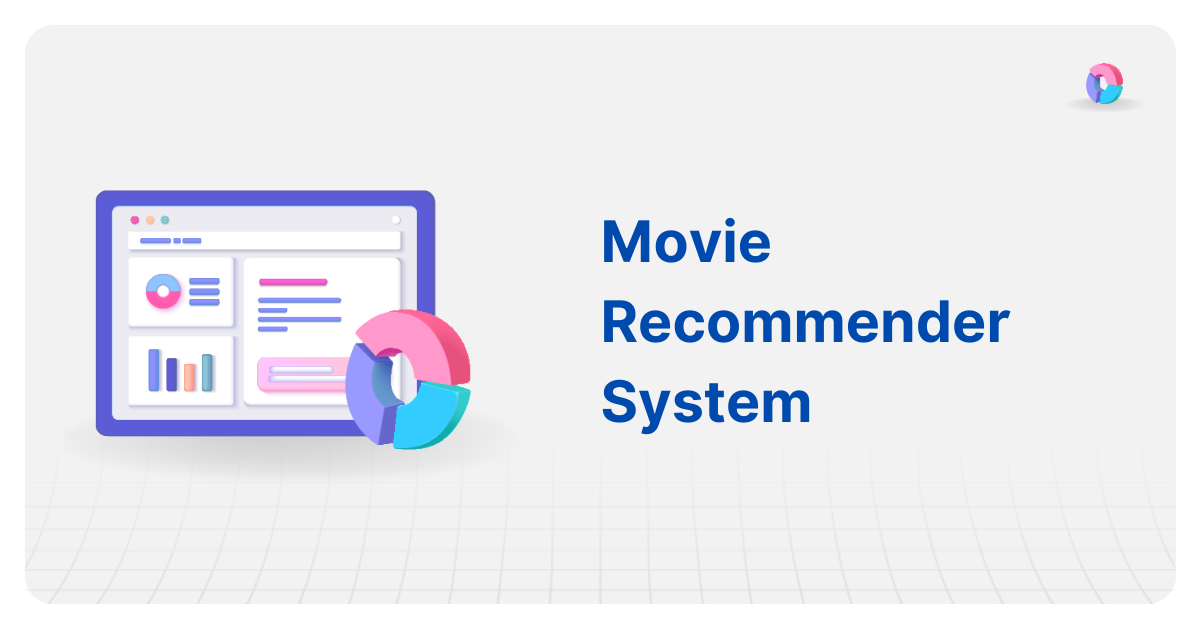
 

## Business Understanding

### Overview
* SteamFlix, a rapidly growing streaming platform that aims to improve their user satisfaction by enhancing engagement on the platform. A key strategy for achieving this goal is to offer personalized recommendations, encouraging users to discover more content and extend their viewing time.
* The goal of this project is to create a system that recommends movies to users. We plan to achieve this by using collaborative filtering, content-based filtering, and hybrid methods.

### Problem Statement
* The existing system on the platform fails to deliver adequate recommendations to users, resulting in low levels of engagement, satisfaction, and retention. Additionally, the system lacks the capability to offer quality recommendations to new users, and existing users do not receive personalized suggestions.
* The new system is designed to avoid these problems and offer relevant recommendations to every user.

### Objectives
* Build a model that delivers the top 5 recommendations for each user.
* Develop a system that tackles the cold start issue for new users.
* Improve the recommendation system to deliver precise and relevant movie suggestions tailored to the user.
* Evaluate the system's performance using suitable metrics, such as `RMSE`.
* Implement a feedback mechanism that allows users to rate the recommendations, helping to refine and personalize future suggestions.

### Challenges
* New users might experience a lack of personalized recommendations initially, which can be discouraging and impact their overall experience on the platform.
* Users may encounter recommendations that do not align with their interests or viewing history, leading to frustration and dissatisfaction with the platform.
* Users may find that their feedback or ratings on recommendations are not effectively used to refine future suggestions, leading to a perception of a poorly tuned system.

### Proposed solutions
* Use techniques such as demographic-based recommendations, popularity-based suggestions, or even initial surveys to understand new users' preferences and provide a baseline for personalized recommendations.
* Implement advanced recommendation algorithms that leverage a combination of collaborative filtering, content-based filtering, and hybrid methods to enhance relevance.
* Establish a robust feedback mechanism where user ratings and preferences are quickly incorporated into the recommendation algorithms. Regularly review and adjust the system based on user input to ensure it remains relevant.

### Conclusion
The existing recommendation system on SteamFlix is inadequate, resulting in low user engagement and satisfaction. To address these issues, the project aims to develop a comprehensive recommendation system designed to enhance user experience by delivering personalized and relevant movie suggestions. This will be achieved through the use of collaborative filtering, content-based filtering, and hybrid methods to ensure that each user's preferences are effectively catered to.


## Data Understanding

### Data Sources
The data is based on [MovieLens](https://grouplens.org/datasets/movielens/latest/) dataset from the GroupLens research lab at the University of Minnesota. We use use the "small" dataset containing 100,000 user ratings due to limited computational power.

### Data Description

There are several `csv` files available with different columns in the `Data file`. The following is a description of columns in each csv file:

#### `movies.csv`
* `movieId` - Unique identifier for each movie.
* `title` - The movie titles.
* `genre` - The various genres a movie falls into.

#### `ratings.csv`
* `userId` - Unique identifier for each user
* `movieId` - Unique identifier for each movie.
* `rating` - A value between 0 to 5 that a user rates a movie on. A higher rating indicates a higher preference.
* `timestamp` - This are the seconds that have passed since Midnight January 1, 1970(UTC)

#### `tags.csv`
* `userId` - Unique identifier for each user
* `movieId` - Unique identifier for each movie.
* `tag` - A word or phrase determined by the user.
* `timestamp` - This are the seconds that have passed since Midnight January 1, 1970(UTC)

#### `links.csv`
* `movieId` - It's an identifier for movies used by https://movielens.org and has link to each movie.
* `imdbId` - It's an identifier for movies used by http://www.imdb.com and has link to each movie.
* `tmdbId` - is an identifier for movies used by https://www.themoviedb.org and has link to each movie.

### Pre-Define Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
np.int = int
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display, HTML

from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline,KNNWithMeans
from surprise.model_selection import GridSearchCV

import joblib

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
# Load Movies
movies_df = pd.read_csv('Data/movies.csv')
# Load Ratings
ratings_df = pd.read_csv('Data/ratings.csv')
# Load Tags 
tags_df = pd.read_csv('Data/tags.csv')
# Load Links
links_df = pd.read_csv('Data/links.csv')

In [3]:
# Display first five rows in each dataset

def display_side_by_side(*dfs, titles=None):
    if titles is None:
        titles = [''] * len(dfs)
        
    # Create HTML for each dataframe with title
    htmls = [df.head().to_html(classes='dataframe', header=True) for df in dfs]
    htmls_with_titles = [f"<h3>{title}</h3>{html}" for html, title in zip(htmls, titles)]
    
    # Combine all HTMLs into one string
    combined_html = ''.join(f"<div style='display: inline-block; vertical-align: top; margin-right: 20px;'>{html}</div>" for html in htmls_with_titles)
    
    # Display the combined HTML
    display(HTML(combined_html))

display_side_by_side(
    movies_df, 
    ratings_df, 
    tags_df, 
    links_df, 
    titles=['Movies DataFrame', 'Ratings DataFrame', 'Tags DataFrame', 'Links DataFrame']
)

In [4]:
# Display Summary Information
def display_infos(*dfs, titles=None):
    if titles is None:
        titles = [''] * len(dfs)
    
    for df, title in zip(dfs, titles):
        print(f"--- {title} ---")
        df.info()
        print("\n")

display_infos(
    movies_df, 
    ratings_df, 
    tags_df, 
    links_df, 
    titles=['Movies DataFrame Info', 'Ratings DataFrame Info', 'Tags DataFrame Info', 'Links DataFrame Info']
)

--- Movies DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


--- Ratings DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


--- Tags DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------  

In [5]:
# Display the shapes of each dataframe
for df, title in zip([movies_df, ratings_df, tags_df, links_df], 
                     ['Movies DataFrame Shape', 'Ratings DataFrame Shape', 'Tags DataFrame Shape', 'Links DataFrame Shape']):
    print(f"{title}: {df.shape}")

Movies DataFrame Shape: (9742, 3)
Ratings DataFrame Shape: (100836, 4)
Tags DataFrame Shape: (3683, 4)
Links DataFrame Shape: (9742, 3)


## Data Preparation & Analysis

### Data Cleaning
        
#### Handling Missing Values

In [6]:
# check for missing values in movies_df
movies_df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

There are no missing values in `movies_df`. This completeness is crucial for accurate movie recommendations, as missing data could lead to incomplete or incorrect suggestions for users. The data is fully populated, which supports reliable analysis and modeling for our recommendation system.

In [7]:
# Check for missing values in ratings_df
ratings_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

There are no missing values in the `ratings_df`, ensuring complete user ratings data for the recommendation system.

In [8]:
# Check for missing values in tags_df
tags_df.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

There are no missing values in `tags_df`, ensuring complete metadata for movie tags in the recommendation system.

In [9]:
# Check for missing values in links_df
links_df.isna().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

For `links_df`, there are `8` missing values in `tmbid` column. Since these are very few, we will retain the rows with missing values in the Links DataFrame to maintain the integrity and completeness of the dataset.

In [10]:
# Count the number of missing values in the 'tmdbId' column
missing_values = links_df['tmdbId'].isnull().sum()

# Get the rows with missing values in the 'tmdbId' column
missing_rows = links_df[links_df['tmdbId'].isnull()]

# Print the number of missing values and the rows containing them
print("Number of missing values in 'tmdbId' column:", missing_values)
print("Rows with missing values in 'tmdbId' column:")
print(missing_rows)

Number of missing values in 'tmdbId' column: 8
Rows with missing values in 'tmdbId' column:
      movieId  imdbId  tmdbId
624       791  113610     NaN
843      1107  102336     NaN
2141     2851   81454     NaN
3027     4051   56600     NaN
5532    26587   92337     NaN
5854    32600  377059     NaN
6059    40697  105946     NaN
7382    79299  874957     NaN


#### Handling Duplicates

In [11]:
#Check for duplicated rows
def check_duplicates(dataframes):
    for name, df in dataframes.items():
        duplicate_rows = df[df.duplicated()]
        if duplicate_rows.empty:
            print(f"There are no duplicate rows in {name}.")
        else:
            print(f"Duplicate rows in {name}:")
            print(duplicate_rows)
            print()  


# Create a dictionary of DataFrames
dataframes = {
    'movies_df': movies_df,
    'ratings_df': ratings_df,
    'tags_df': tags_df,
    'links_df': links_df
}

# Check for duplicates
check_duplicates(dataframes)

There are no duplicate rows in movies_df.
There are no duplicate rows in ratings_df.
There are no duplicate rows in tags_df.
There are no duplicate rows in links_df.


Since there are no duplicate rows in any of the dataframes (`movies_df`, `ratings_df`, `tags_df`, and `links_df`), we can proceed with further data analysis and exploration without needing to remove any duplicates, ensuring data integrity.

#### Drop Columns

To proceed with our project, we will drop the `userId` and `timestamp` columns from the tags_df dataframe before merging the datasets.

In [12]:
# We now drop userID and timestamp columns in tags dataset
tags_df = tags_df.drop(['userId', 'timestamp'], axis=1)
tags_df.head()

,movieId,tag
0,60756,funny
1,60756,Highly quotable
2,60756,will ferrell
3,89774,Boxing story
4,89774,MMA


#### Merge Datasets

In [13]:
# Merge the datasets

# movies and ratings on movieId
movies_ratings = pd.merge(left=movies_df, right=ratings_df, on='movieId')

# movies__ratings and links on the movieId
movies_ratings_links = pd.merge(left=movies_ratings, right=links_df, on='movieId')

# movies_ratings_links on movieId
combined_df = pd.merge(left=movies_ratings_links, right=tags_df, on='movieId')

In [14]:
#Display New dataset
combined_df.head()

,movieId,title,genres,userId,rating,timestamp,imdbId,tmdbId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,fun
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,pixar
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,pixar


In [15]:
combined_df.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp', 'imdbId',
       'tmdbId', 'tag'],
      dtype='object')

The new dataframe has a total of 8 columns

### Feature Engineering

In the feature engineering process, we extracted the release year of each movie from the `title` column and created a new `Year` feature. We then cleaned the `title` column by removing the year information in parentheses to ensure consistency in our dataset.

In [16]:
# Now we engineer a new feature "Year" in which a movie was released by extracting it from the "Title"
combined_df['Year'] = combined_df['title'].str.extract(r'\((\d{4})\)')
combined_df

,movieId,title,genres,userId,rating,timestamp,imdbId,tmdbId,tag,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,pixar,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,pixar,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,fun,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,pixar,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,pixar,1995
...,...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,3778644,348350.0,star wars,2018
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,1636780,71172.0,anime,2010
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,1636780,71172.0,comedy,2010
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,1636780,71172.0,gintama,2010


In [17]:
# Let us clean the title column by droppping the year with paranthesis
combined_df['title'] = combined_df['title'].str.replace(r'\s*\(\d{4}\)', '')
combined_df.head()

,movieId,title,genres,userId,rating,timestamp,imdbId,tmdbId,tag,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,pixar,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,pixar,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,114709,862.0,fun,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,pixar,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,114709,862.0,pixar,1995


#### Further Exploration

In [18]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233213 entries, 0 to 233212
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    233213 non-null  int64  
 1   title      233213 non-null  object 
 2   genres     233213 non-null  object 
 3   userId     233213 non-null  int64  
 4   rating     233213 non-null  float64
 5   timestamp  233213 non-null  int64  
 6   imdbId     233213 non-null  int64  
 7   tmdbId     233213 non-null  float64
 8   tag        233213 non-null  object 
 9   Year       233210 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 17.8+ MB


In [19]:
combined_df.isna().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
imdbId       0
tmdbId       0
tag          0
Year         3
dtype: int64

In [20]:
# Find the number of rows with missing values
rows_with_missing_values = combined_df.isna().any(axis=1).sum()

print(f'Number of rows with missing values: {rows_with_missing_values}')

Number of rows with missing values: 3


Dropping the 3 rows with missing values in the `Year` column ensures the consistency of our dataset and avoids potential biases in the analysis, as missing year information could affect the accuracy of trends and recommendations.

In [21]:
# Convert 'Year' column to numeric, coercing errors to NaN
combined_df['Year'] = pd.to_numeric(combined_df['Year'], errors='coerce')

# Drop rows where 'Year' is NaN after conversion
combined_df = combined_df.dropna(subset=['Year'])

# Convert 'Year' to integers
combined_df['Year'] = combined_df['Year'].astype(int)

### Exploratory Data Analysis (EDA)

#### Distribution of Ratings



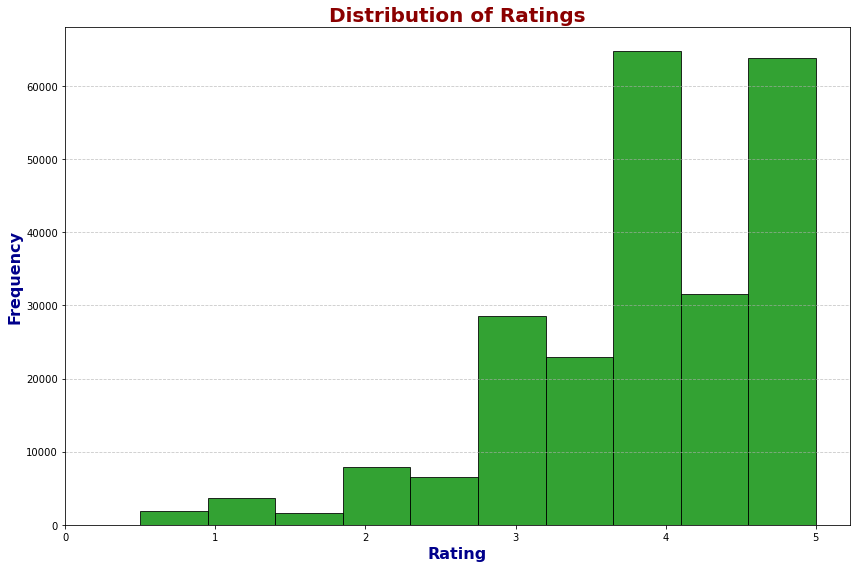

In [22]:
# Histogram for Distribution of Ratings
plt.figure(figsize=(12, 8))
plt.hist(combined_df['rating'], bins=10, color='#008B00', edgecolor='black', alpha=0.8)
plt.xlabel('Rating', fontsize=16, color='darkblue', weight='bold')
plt.ylabel('Frequency', fontsize=16, color='darkblue', weight='bold')
plt.title('Distribution of Ratings', fontsize=20, color='darkred', weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(int(combined_df['rating'].min()), int(combined_df['rating'].max()) + 1))
plt.tight_layout()
plt.show()

The highest rated movies received a perfect score of 4, while the lowest ratings were as low as 0.5. Most movies were rated at either 5 or 4, with a smaller number receiving the lowest ratings of 0.5 and 1.5. Many movies received a rating of 4, suggesting they were also positively viewed but not as exceptional.

#### Top Movie Genres

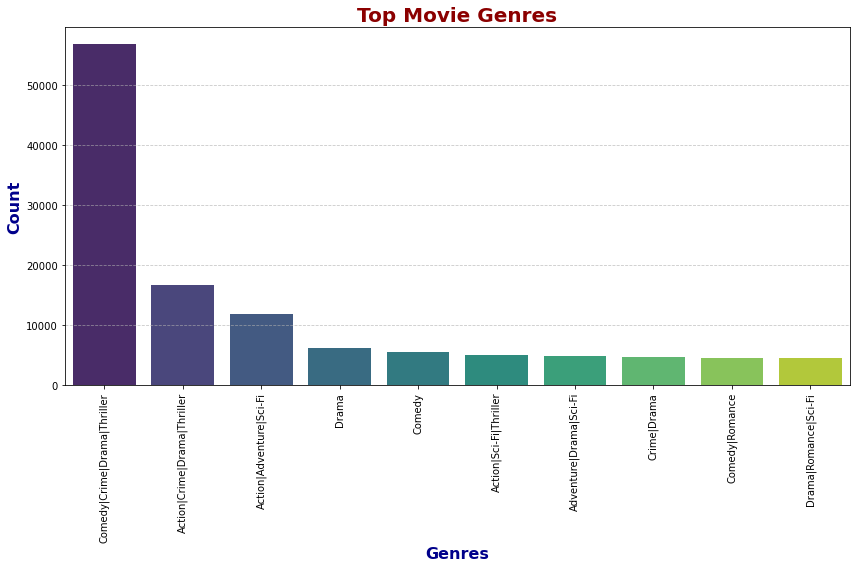

In [23]:
#Top Genres
genres_counts = combined_df['genres'].value_counts().head(10)

# Plot bar chart with improved aesthetics
plt.figure(figsize=(12, 8))
sns.barplot(x=genres_counts.index, y=genres_counts.values, palette='viridis')  
plt.xlabel('Genres', fontsize=16, color='darkblue', weight='bold')  
plt.ylabel('Count', fontsize=16, color='darkblue', weight='bold')  
plt.title('Top Movie Genres', fontsize=20, color='darkred', weight='bold')  
plt.xticks(rotation=90, fontsize=10, color='black')  
plt.yticks(fontsize=10, color='black')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout() 
plt.show()


`Comedy|Crime|Drama|Thriller|` genre  category are the most frequently represented, indicating they are well-represented in user ratings and likely to be significant for understanding user preferences and recommendations.

#### Movie Production By Decade

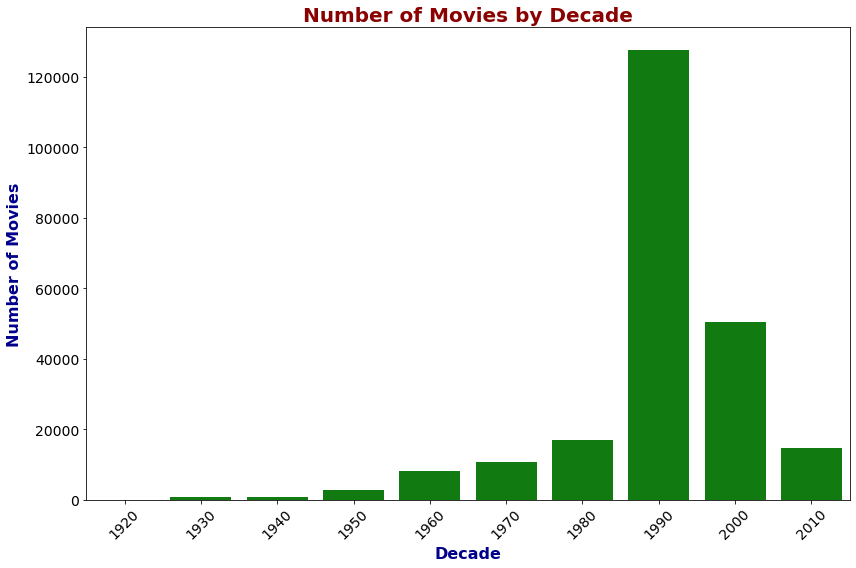

In [24]:
#Number of Movies Every Decade

# Group years by decades
combined_df['Decade'] = (combined_df['Year'] // 10) * 10

fig, ax = plt.subplots(figsize=(12, 8))

# Create count plot
sns.countplot(x='Decade', data=combined_df, color='#008B00', ax=ax)

# Customize labels and title
plt.xlabel("Decade", fontsize=16, color='darkblue', weight='bold')
plt.ylabel("Number of Movies", fontsize=16, color='darkblue', weight='bold')
plt.title("Number of Movies by Decade", fontsize=20, color='darkred', weight='bold')

# Customize tick labels
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Remove grid lines for cleaner look
ax.grid(False)

# Update x-axis labels with the decade range
decades = np.sort(combined_df['Decade'].dropna().unique())
ax.set_xticks(np.arange(len(decades)))
ax.set_xticklabels(decades, fontsize=14)

plt.tight_layout()
plt.show()

The bar plot of movies by decade reveals that the `1930s` had a significantly lower number of movies compared to the `1990s`, which had over `120,000` movies. This indicates a substantial increase in movie production over the decades, with a notable surge in the number of movies released during the `1990s`. However, the production reduced drastically from `2000` to `2010`

#### Top Genres 

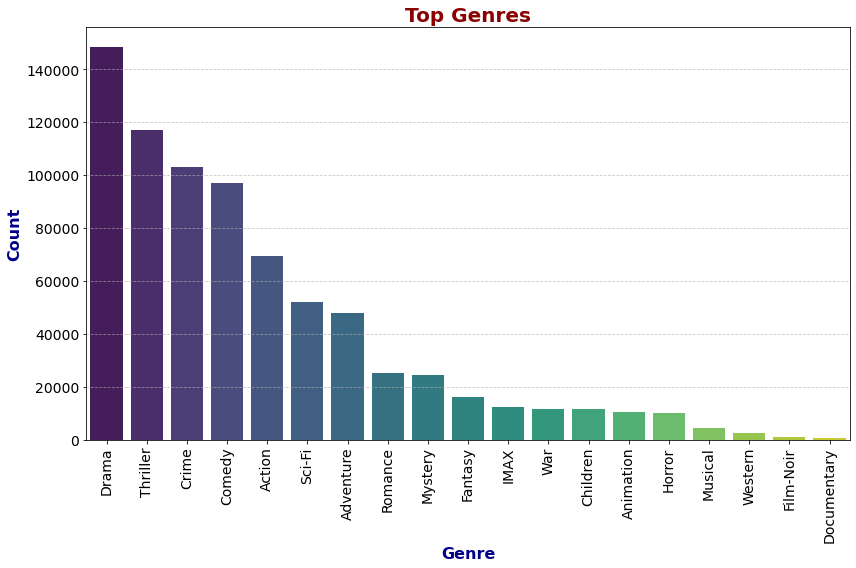

In [25]:
# Top Genres by Frequency
genres_text = '|'.join(combined_df['genres'])
genres_list = genres_text.split('|')
word_frequency = {}
for genre in genres_list:
    word_frequency[genre] = word_frequency.get(genre, 0) + 1

# Convert the word frequency dictionary to a pandas Series
word_frequency_2 = pd.Series(word_frequency)
word_frequency_2 = word_frequency_2.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=word_frequency_2.index, y=word_frequency_2.values, palette='viridis')
plt.xlabel('Genre', fontsize=16, color='darkblue', weight='bold')
plt.ylabel('Count', fontsize=16, color='darkblue', weight='bold')
plt.title('Top Genres', fontsize=20, color='darkred', weight='bold')
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


The analysis shows that `Drama`, `Thriller`, `Crime`, and `Comedy` are the most popular genres, as they appear most frequently in the dataset. In contrast, `Film Noir` and `Documentary` are the least watched genres, indicating their lower prevalence and popularity among movies.

#### Top Genres by Average Rating

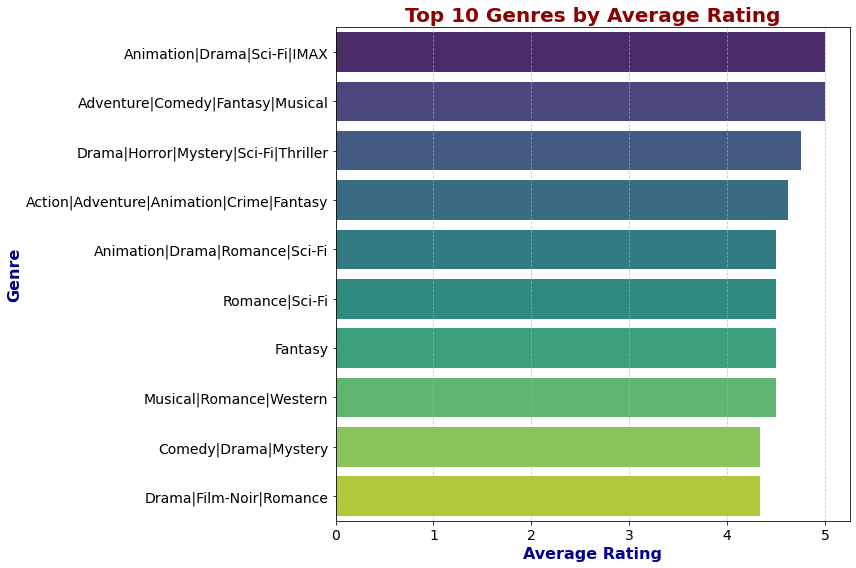

In [26]:
# Calculate the average rating for each genre
genre_rating_avg = combined_df.groupby('genres')['rating'].mean().sort_values(ascending=False)

# Get the top N genres by average rating
top_n = 10
top_genres = genre_rating_avg.head(top_n)

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis')
plt.ylabel('Genre', fontsize=16, color='darkblue', weight='bold')
plt.xlabel('Average Rating', color='darkblue', fontsize=16, weight='bold')
plt.title(f'Top {top_n} Genres by Average Rating', color='darkred', fontsize=20, weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

The top 10 genres by average rating reveal that `Animation, Drama, Sci-Fi, and IMAX` are rated the highest, indicating strong viewer satisfaction in these categories. Conversely, `Drama, Film-Noir, and Romance` have the lowest average ratings, suggesting they are less favorably received by audiences.

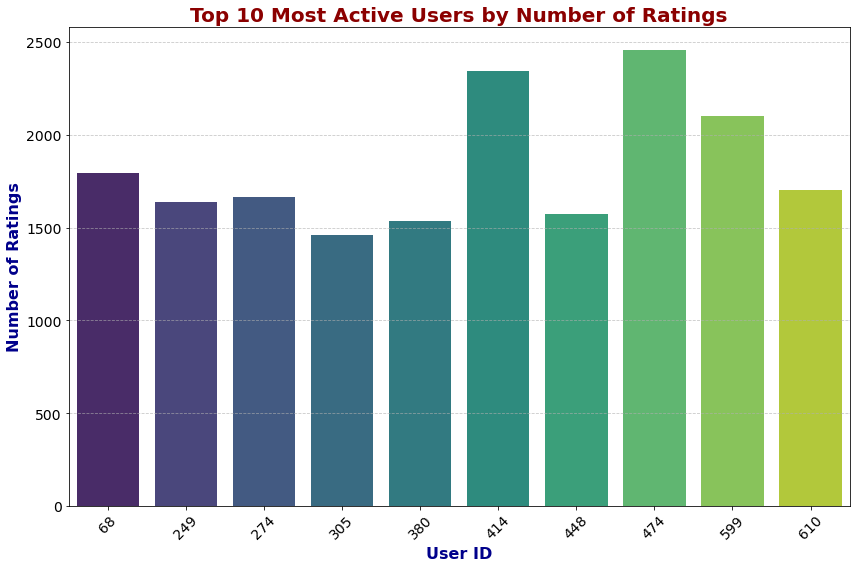

In [27]:
# Top 10 Active Users

# Calculate the number of ratings per user
user_ratings = combined_df.groupby('userId')['rating'].count()

# Get the top 10 most active users
top_users = user_ratings.nlargest(10)

# Create the bar plot for the top 10 most active users
plt.figure(figsize=(12, 8))
sns.barplot(x=top_users.index, y=top_users.values, palette='viridis')
plt.xlabel('User ID', fontsize=16, color='darkblue', weight='bold')
plt.ylabel('Number of Ratings', fontsize=16, color='darkblue', weight='bold')
plt.title('Top 10 Most Active Users by Number of Ratings', fontsize=20, color='darkred', weight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


User `474` is the most active, contributing `2,400 ratings`, indicating high engagement with the movie database. Users `414` and `599` are also notably active but have fewer ratings compared to User `474`, suggesting that while they contribute substantially, they do not reach the same level of activity.

#### Trend Analysis

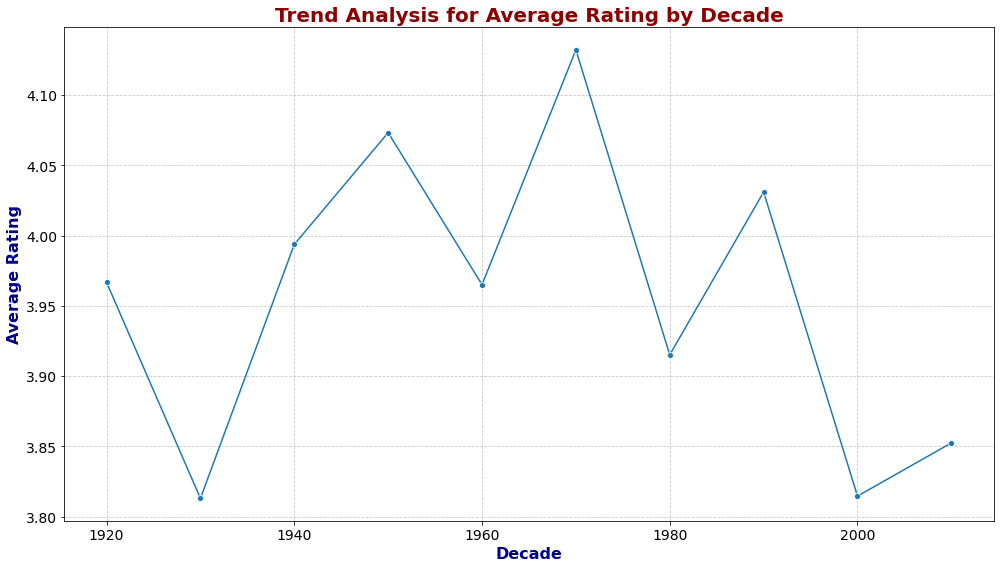

In [28]:
# Average Rating by Decade
decade_rating_avg = combined_df.groupby('Decade')['rating'].mean().sort_index()

# Create the line plot for average rating by decade
plt.figure(figsize=(14, 8))
sns.lineplot(x=decade_rating_avg.index, y=decade_rating_avg.values, marker='o', palette='viridis')
plt.xlabel('Decade', fontsize=16, color='darkblue', weight='bold')
plt.ylabel('Average Rating', fontsize=16, color='darkblue', weight='bold')
plt.title('Trend Analysis for Average Rating by Decade', fontsize=20, color='darkred', weight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


The trend shows that movies from the 1930s have the lowest average ratings, while those from the `1940s` have the highest. Overall, average ratings have been declining since the `1950s`, with a significant drop between `1970` and `1980`, suggesting that the year of production is a crucial factor in assessing a movie's average rating.

## Modeling & Evaluation

#### Preparing Data for Surprise 

In [29]:
# Prepare data for surprise
df_movies = pd.read_csv('Data/movies.csv')
df_ratings = pd.read_csv('Data/ratings.csv')
df_tags = pd.read_csv('Data/tags.csv')
df_links = pd.read_csv('Data/links.csv')

In [30]:
Prepare data for Surprise
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(df_ratings[['userId', 'movieId', 'rating']], reader)


#### Training SVD, KNNBasic & KNNWithMeans Models

In [31]:

def evaluate_models(data):
    # Split the data into training and test sets
    trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

    # Define a list of models to evaluate
    models = [
        SVD(),
        KNNBasic(sim_options={'name': 'pearson', 'user_based': True}),
        KNNWithMeans(sim_options={'name': 'pearson', 'user_based': True})
    ]

    # Evaluate each model and store the results
    results = []
    for model in models:
        # Perform cross-validation
        cv_results = cross_validate(model, data, measures=['RMSE'], cv=5, verbose=False)

        # Get the average RMSE from cross-validation
        rmse = cv_results['test_rmse'].mean()

        # Store the model and its performance
        results.append({'model': model.__class__.__name__, 'rmse': rmse})

    # Convert the results to a DataFrame
    performance_df = pd.DataFrame(results)
    
    return performance_df
evaluate_models(data)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


,model,rmse
0,SVD,0.874106
1,KNNBasic,0.973791
2,KNNWithMeans,0.896503


#### Model Comparison with RMSE

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


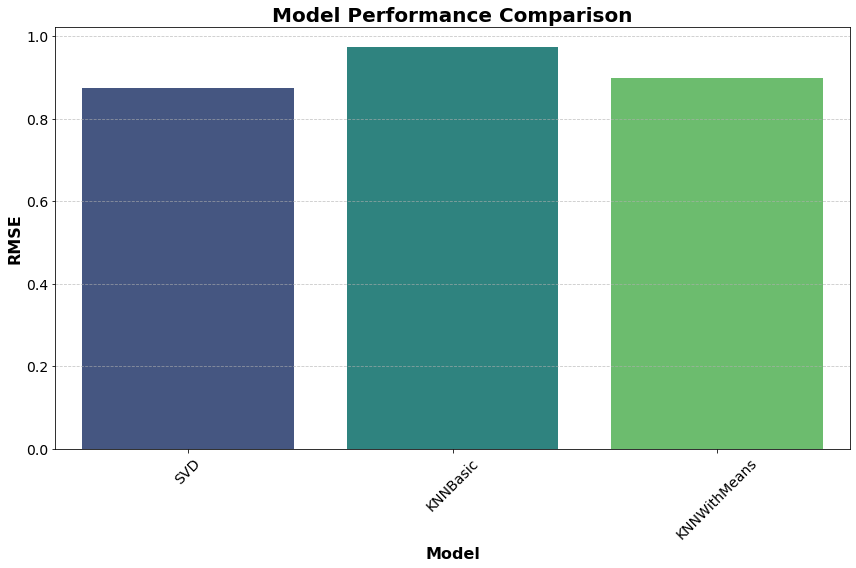

In [32]:
performance_df = evaluate_models(data)

# Plot the performance of each model
plt.figure(figsize=(12, 8))
sns.barplot(x='model', y='rmse', data=performance_df, palette='viridis')
plt.title('Model Performance Comparison', fontsize=20, weight='bold')
plt.xlabel('Model', fontsize=16, weight='bold')
plt.ylabel('RMSE', fontsize=16, weight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

#### Fit SVD Model

In [33]:
# Define the parameter grid
params = {'n_factors': [20, 50, 100], 'reg_all': [0.02, 0.05, 0.1]}

# Perform Grid Search
g_s_svd = GridSearchCV(SVD, param_grid=params, n_jobs=-1, measures=['rmse'], cv=5)
g_s_svd.fit(data)

# Output the best score and best parameters
print("Best RMSE Score: ", g_s_svd.best_score['rmse'])
print("Best Parameters: ", g_s_svd.best_params['rmse'])

Best RMSE Score:  0.8689835790309699
Best Parameters:  {'n_factors': 50, 'reg_all': 0.05}


In [34]:
# Split the data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
#Train SVD Model 
svd = SVD(n_factors=100, reg_all=0.05)
svd.fit(trainset)

#### Collect Movie Ratings from the User

In [35]:
# Function to collect movie ratings from the user
def get_movie_ratings(movie_df, num_ratings, preferred_genre=None):
    user_id = 1000
    ratings = []
    missed_count = 0  
    
    while num_ratings > 0:
        # Filter movies based on genre if provided
        if preferred_genre:
            movie_sample = movie_df[movie_df['genres'].str.contains(preferred_genre, case=False, na=False)].sample(1)
        else:
            movie_sample = movie_df.sample(1)
        
        movie_title = movie_sample['title'].values[0]
        movie_id = movie_sample['movieId'].values[0]
        
        print(f"\nMovie: {movie_title}")
        rating_input = input('Rate this movie from 1 to 5, or press "n" if you have not seen it:\n')
        
        if rating_input.lower() == 'n':
            missed_count += 1
            if missed_count >= 3 and not preferred_genre:
                preferred_genre = input('You have skipped several movies. Could you please tell us your favorite genre?\n')
            continue
        elif rating_input.isdigit() and 1 <= int(rating_input) <= 5:
            ratings.append({'userId': user_id, 'movieId': movie_id, 'rating': float(rating_input)})
            num_ratings -= 1
            missed_count = 0  
        else:
            print('Invalid input. Please enter a number between 1 and 5 or "n".')
    
    return ratings


df_movies = pd.read_csv('Data/movies.csv')  
user_ratings = get_movie_ratings(df_movies, 4, 'Comedy')

# Print collected ratings
print("\nCollected Ratings:")
for rating in user_ratings:
    print(f"User ID: {rating['userId']}, Movie ID: {rating['movieId']}, Rating: {rating['rating']}")



Movie: Maid in Manhattan (2002)
Rate this movie from 1 to 5, or press "n" if you have not seen it:
4

Movie: Losin' It (1983)
Rate this movie from 1 to 5, or press "n" if you have not seen it:
2

Movie: Mystery Train (1989)
Rate this movie from 1 to 5, or press "n" if you have not seen it:
1

Movie: Meet the Feebles (1989)
Rate this movie from 1 to 5, or press "n" if you have not seen it:
3

Collected Ratings:
User ID: 1000, Movie ID: 5943, Rating: 4.0
User ID: 1000, Movie ID: 4204, Rating: 2.0
User ID: 1000, Movie ID: 3521, Rating: 1.0
User ID: 1000, Movie ID: 4624, Rating: 3.0


In [36]:
# Convert the list of new ratings to a DataFrame
user_ratings_df = pd.DataFrame(user_ratings)

# Load the original ratings data
original_ratings_df = pd.read_csv('Data/ratings.csv')

# Combine the original ratings with new user ratings
combined_ratings_df = pd.concat([original_ratings_df, user_ratings_df], axis=0)


combined_ratings_df = combined_ratings_df[['userId', 'movieId', 'rating']]
combined_ratings_df['rating'] = combined_ratings_df['rating'].astype(float)

# Define the rating scale for Surprise
reader = Reader(rating_scale=(0.5, 5.0))

# Create a new Dataset object from the updated DataFrame
new_data = Dataset.load_from_df(combined_ratings_df, reader)

#### Predictions

In [37]:
# Generate movie recommendations for the user with userId = 1000
list_of_movies = []
for movie_id in ratings_df['movieId'].unique():
    # Predict the rating the user would give to each movie
    predicted_rating = svd.predict(1000, movie_id).est
    list_of_movies.append((movie_id, predicted_rating))

# Order the recommendations from highest to lowest rated
ranked_movies = sorted(list_of_movies, key=lambda x: x[1], reverse=True)

# Convert the ranked movies to a DataFrame for better readability
recommendations_df = pd.DataFrame(ranked_movies, columns=['movieId', 'predicted_rating'])

# Display the top 10 recommendations
top_10_ranked = recommendations_df.head(10)
print(top_10_ranked)

   movieId  predicted_rating
0     1204          4.357099
1      318          4.339029
2      904          4.316974
3      750          4.313359
4     1172          4.296322
5       50          4.281192
6     2959          4.269227
7      858          4.249133
8     1213          4.249110
9     1208          4.244416


In [38]:
top_10_ranked[:5]

,movieId,predicted_rating
0,1204,4.357099
1,318,4.339029
2,904,4.316974
3,750,4.313359
4,1172,4.296322


In [39]:
# Print the top 5 movie recommendations for the user
n = 5
for idx, rec in enumerate(ranked_movies):
    # Get the movie ID and predicted rating
    movie_id, _ = rec
    
    # Fetch the movie title from the movies DataFrame
    title = df_movies.loc[df_movies['movieId'] == movie_id, 'title'].values[0]
    
    # Print the recommendation
    print(f'Recommendation #{idx + 1}: {title}\n')
    
    # Break the loop after printing 5 recommendations
    n -= 1
    if n == 0:
        break


Recommendation #1: Lawrence of Arabia (1962)

Recommendation #2: Shawshank Redemption, The (1994)

Recommendation #3: Rear Window (1954)

Recommendation #4: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)

Recommendation #5: Cinema Paradiso (Nuovo cinema Paradiso) (1989)



## Deployment

In [40]:
# Save the trained model
filename = 'svd_model.pkl'
joblib.dump(svd, filename)
print(f'Model saved to {filename}')

# Load the model
loaded_model = joblib.load(filename)
print(f'Model loaded from {filename}')

Model saved to svd_model.pkl
Model loaded from svd_model.pkl


## Conclusion & Recommendations